In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
house_df = pd.read_csv('train.csv')

In [6]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
house_df = pd.get_dummies(house_df)

In [8]:
house_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
house_df.fillna(0,inplace=True)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(house_df.drop(['SalePrice'],axis=1),house_df.SalePrice,test_size =0.3,random_state=0)

In [12]:
house_df.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 290, dtype: int64

In [13]:
house_df.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 290, dtype: int64

# Tree based 

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparemater

In [15]:
model = RandomForestClassifier(n_estimators=5)

In [16]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [17]:
important_feature = model.feature_importances_

In [18]:
important_feature

array([0.02886828, 0.01104548, 0.02022608, 0.02562063, 0.0154142 ,
       0.01127416, 0.02048844, 0.02073738, 0.01255631, 0.01963739,
       0.00516407, 0.02826116, 0.02136856, 0.03034452, 0.01633299,
       0.00229591, 0.02823219, 0.00657282, 0.0042656 , 0.00761949,
       0.00617005, 0.01160765, 0.00237278, 0.01480987, 0.00927889,
       0.02665819, 0.00404573, 0.02850328, 0.01342846, 0.01197505,
       0.00503173, 0.00137222, 0.0047604 , 0.        , 0.00445605,
       0.01386997, 0.01580589, 0.00059   , 0.00100467, 0.00119014,
       0.00390403, 0.00225104, 0.        , 0.00068609, 0.00121763,
       0.00090521, 0.00748851, 0.00422432, 0.00080545, 0.00753388,
       0.002252  , 0.00235905, 0.00145402, 0.00235126, 0.        ,
       0.        , 0.00530938, 0.00463524, 0.00120424, 0.00097825,
       0.00462545, 0.00269233, 0.00136289, 0.        , 0.00095204,
       0.        , 0.        , 0.00197849, 0.00048327, 0.00391704,
       0.00150245, 0.00216637, 0.00234446, 0.00210667, 0.00041

In [59]:
house_df_vis = pd.DataFrame({"Features":x_train.columns,"Importances":important_feature})

In [60]:
house_df_vis.set_index('Importances')

,Features
Importances,
0.025164,Id
0.009509,MSSubClass
0.020019,LotFrontage
0.027436,LotArea
0.017274,OverallQual
...,...
0.000786,SaleCondition_AdjLand
0.000197,SaleCondition_Alloca
0.000197,SaleCondition_Family


In [61]:
house_df_vis = house_df_vis.sort_values('Importances')

In [62]:
house_df_vis

,Features,Importances
140,Exterior1st_ImStucc,0.000000
207,Heating_Floor,0.000000
150,Exterior2nd_Brk Cmn,0.000000
236,FireplaceQu_Ex,0.000000
126,RoofMatl_CompShg,0.000000
...,...,...
0,Id,0.025164
11,BsmtUnfSF,0.026634
35,MoSold,0.026891
3,LotArea,0.027436


<AxesSubplot:>

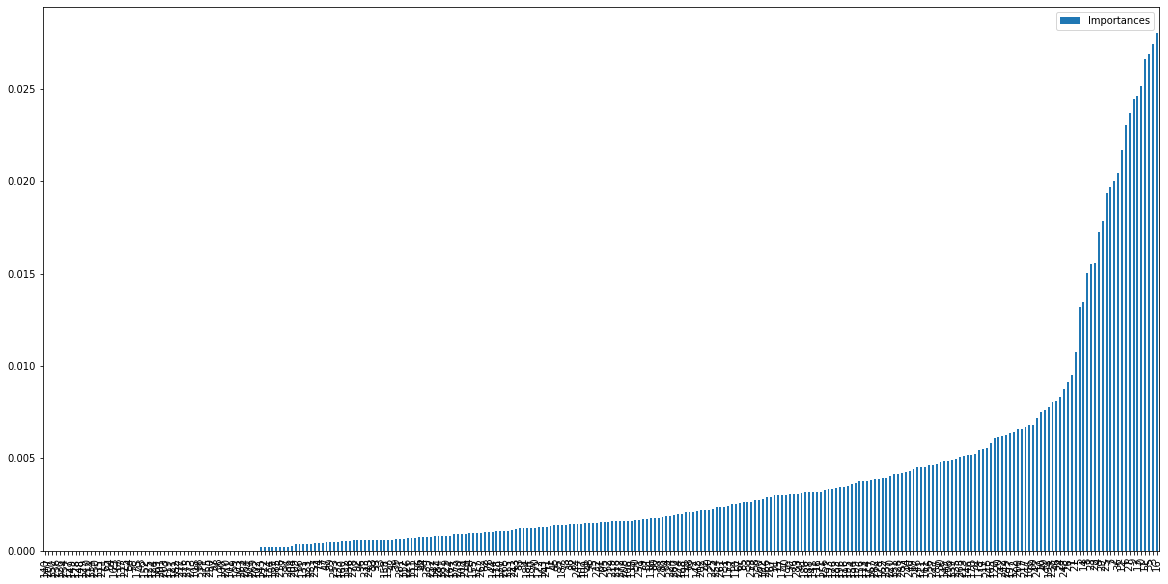

In [65]:
house_df_vis.plot.bar(figsize=(20,10))

# Regularization